## Bank churn prediction analysis using Deep Learning Approach and Regression


- Author: Muhammad Hassan Razzaq
- Qualification: PhD (Mechanical Engineering and AI)
- Linkedin: https://www.linkedin.com/in/mhassanrazzaq/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
df = pd.read_csv('Bank Churn 15k - train.csv')
df_test = pd.read_csv('Bank Churn 10k - test.csv')

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15765322.0,Udegbulam,663.0,France,Male,38.0,6.0,0.00,2.0,0.0,1.0,180591.32,0.0
1,1,15647572.0,Hsiao,678.0,France,Female,26.0,2.0,0.00,1.0,1.0,1.0,44506.09,0.0
2,2,15697045.0,Mistry,741.0,France,Female,38.0,9.0,0.00,2.0,1.0,1.0,72969.90,0.0
3,3,15723604.0,Okagbue,535.0,Germany,Female,46.0,8.0,117715.84,1.0,1.0,0.0,70778.62,0.0
4,4,15704819.0,Chukwudi,671.0,Germany,Female,51.0,6.0,101827.07,1.0,0.0,0.0,54439.73,1.0


In [4]:
df.shape

(15000, 14)

In [5]:
df_test.shape

(10000, 13)

In [6]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.569274e+07,657.921600,37.729000,5.006533,42236.948872,1.581267,0.778867,0.493000,116879.055932,0.202200
std,4330.271354,7.139941e+04,73.405406,8.166068,2.784422,59509.961303,0.526954,0.415024,0.499968,45604.313222,0.401654
min,0.000000,1.556580e+07,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,447.730000,0.000000
25%,3749.750000,1.563428e+07,601.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82551.557500,0.000000
50%,7499.500000,1.569077e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122433.090000,0.000000
75%,11249.250000,1.575783e+07,709.000000,42.000000,7.000000,108586.860000,2.000000,1.000000,1.000000,154108.877500,0.000000
max,14999.000000,1.581566e+07,850.000000,72.000000,10.000000,187638.140000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [8]:
df.isnull().sum().sort_values()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15000.0,7.499500e+03,4330.271354,0.00,3.749750e+03,7499.50,1.124925e+04,14999.00
CustomerId,15000.0,1.569274e+07,71399.405840,15565796.00,1.563428e+07,15690772.00,1.575783e+07,15815660.00
CreditScore,15000.0,6.579216e+02,73.405406,431.00,6.010000e+02,659.00,7.090000e+02,850.00
Age,15000.0,3.772900e+01,8.166068,18.00,3.200000e+01,37.00,4.200000e+01,72.00
Tenure,15000.0,5.006533e+00,2.784422,0.00,3.000000e+00,5.00,7.000000e+00,10.00
Balance,15000.0,4.223695e+04,59509.961303,0.00,0.000000e+00,0.00,1.085869e+05,187638.14
NumOfProducts,15000.0,1.581267e+00,0.526954,1.00,1.000000e+00,2.00,2.000000e+00,4.00
HasCrCard,15000.0,7.788667e-01,0.415024,0.00,1.000000e+00,1.00,1.000000e+00,1.00
IsActiveMember,15000.0,4.930000e-01,0.499968,0.00,0.000000e+00,0.00,1.000000e+00,1.00
EstimatedSalary,15000.0,1.168791e+05,45604.313222,447.73,8.255156e+04,122433.09,1.541089e+05,199992.48


In [10]:
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
CustomerId,15765322.0,15647572.0,15697045.0,15723604.0,15704819.0
Surname,Udegbulam,Hsiao,Mistry,Okagbue,Chukwudi
CreditScore,663.0,678.0,741.0,535.0,671.0
Geography,France,France,France,Germany,Germany
Gender,Male,Female,Female,Female,Female
Age,38.0,26.0,38.0,46.0,51.0
Tenure,6.0,2.0,9.0,8.0,6.0
Balance,0.0,0.0,0.0,117715.84,101827.07
NumOfProducts,2.0,1.0,2.0,1.0,1.0


In [11]:
df.Geography.value_counts()

Geography
France     8895
Spain      3422
Germany    2683
Name: count, dtype: int64

In [12]:
df.Gender.value_counts()

Gender
Male      8486
Female    6514
Name: count, dtype: int64

<Axes: >

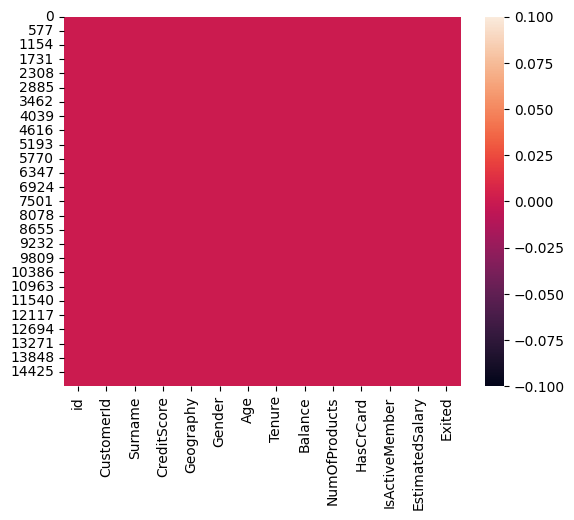

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
cat_cols = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Geography', 'Gender']
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [16]:
for col in cat_cols:
    print(f'{col} unique values are: {df[col].nunique()} => {(df[col].unique())}')


Tenure unique values are: 11 => [ 6.  2.  9.  8.  3.  7.  1. 10.  5.  4.  0.]
NumOfProducts unique values are: 4 => [2. 1. 3. 4.]
HasCrCard unique values are: 2 => [0. 1.]
IsActiveMember unique values are: 2 => [1. 0.]
Exited unique values are: 2 => [0. 1.]
Geography unique values are: 3 => ['France' 'Germany' 'Spain']
Gender unique values are: 2 => ['Male' 'Female']


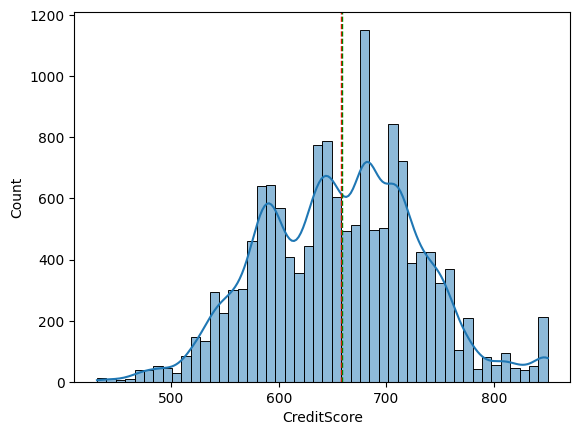

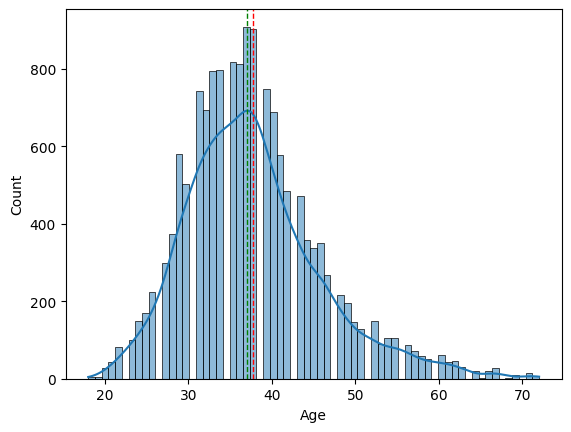

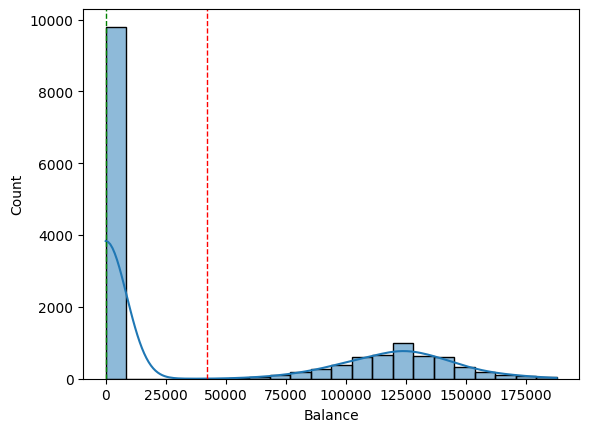

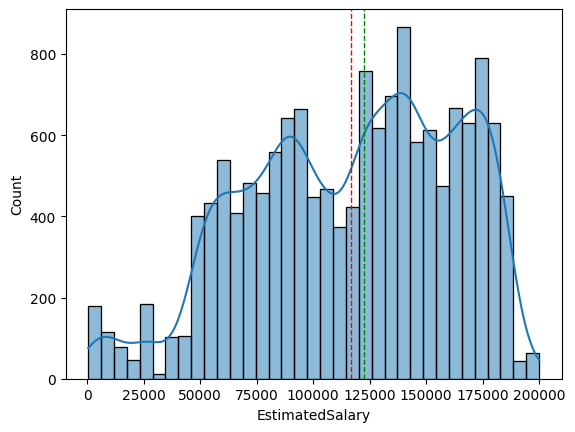

In [17]:
for col in num_cols:
    sns.histplot(df, x=col, kde=True)
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=1)
    plt.show()

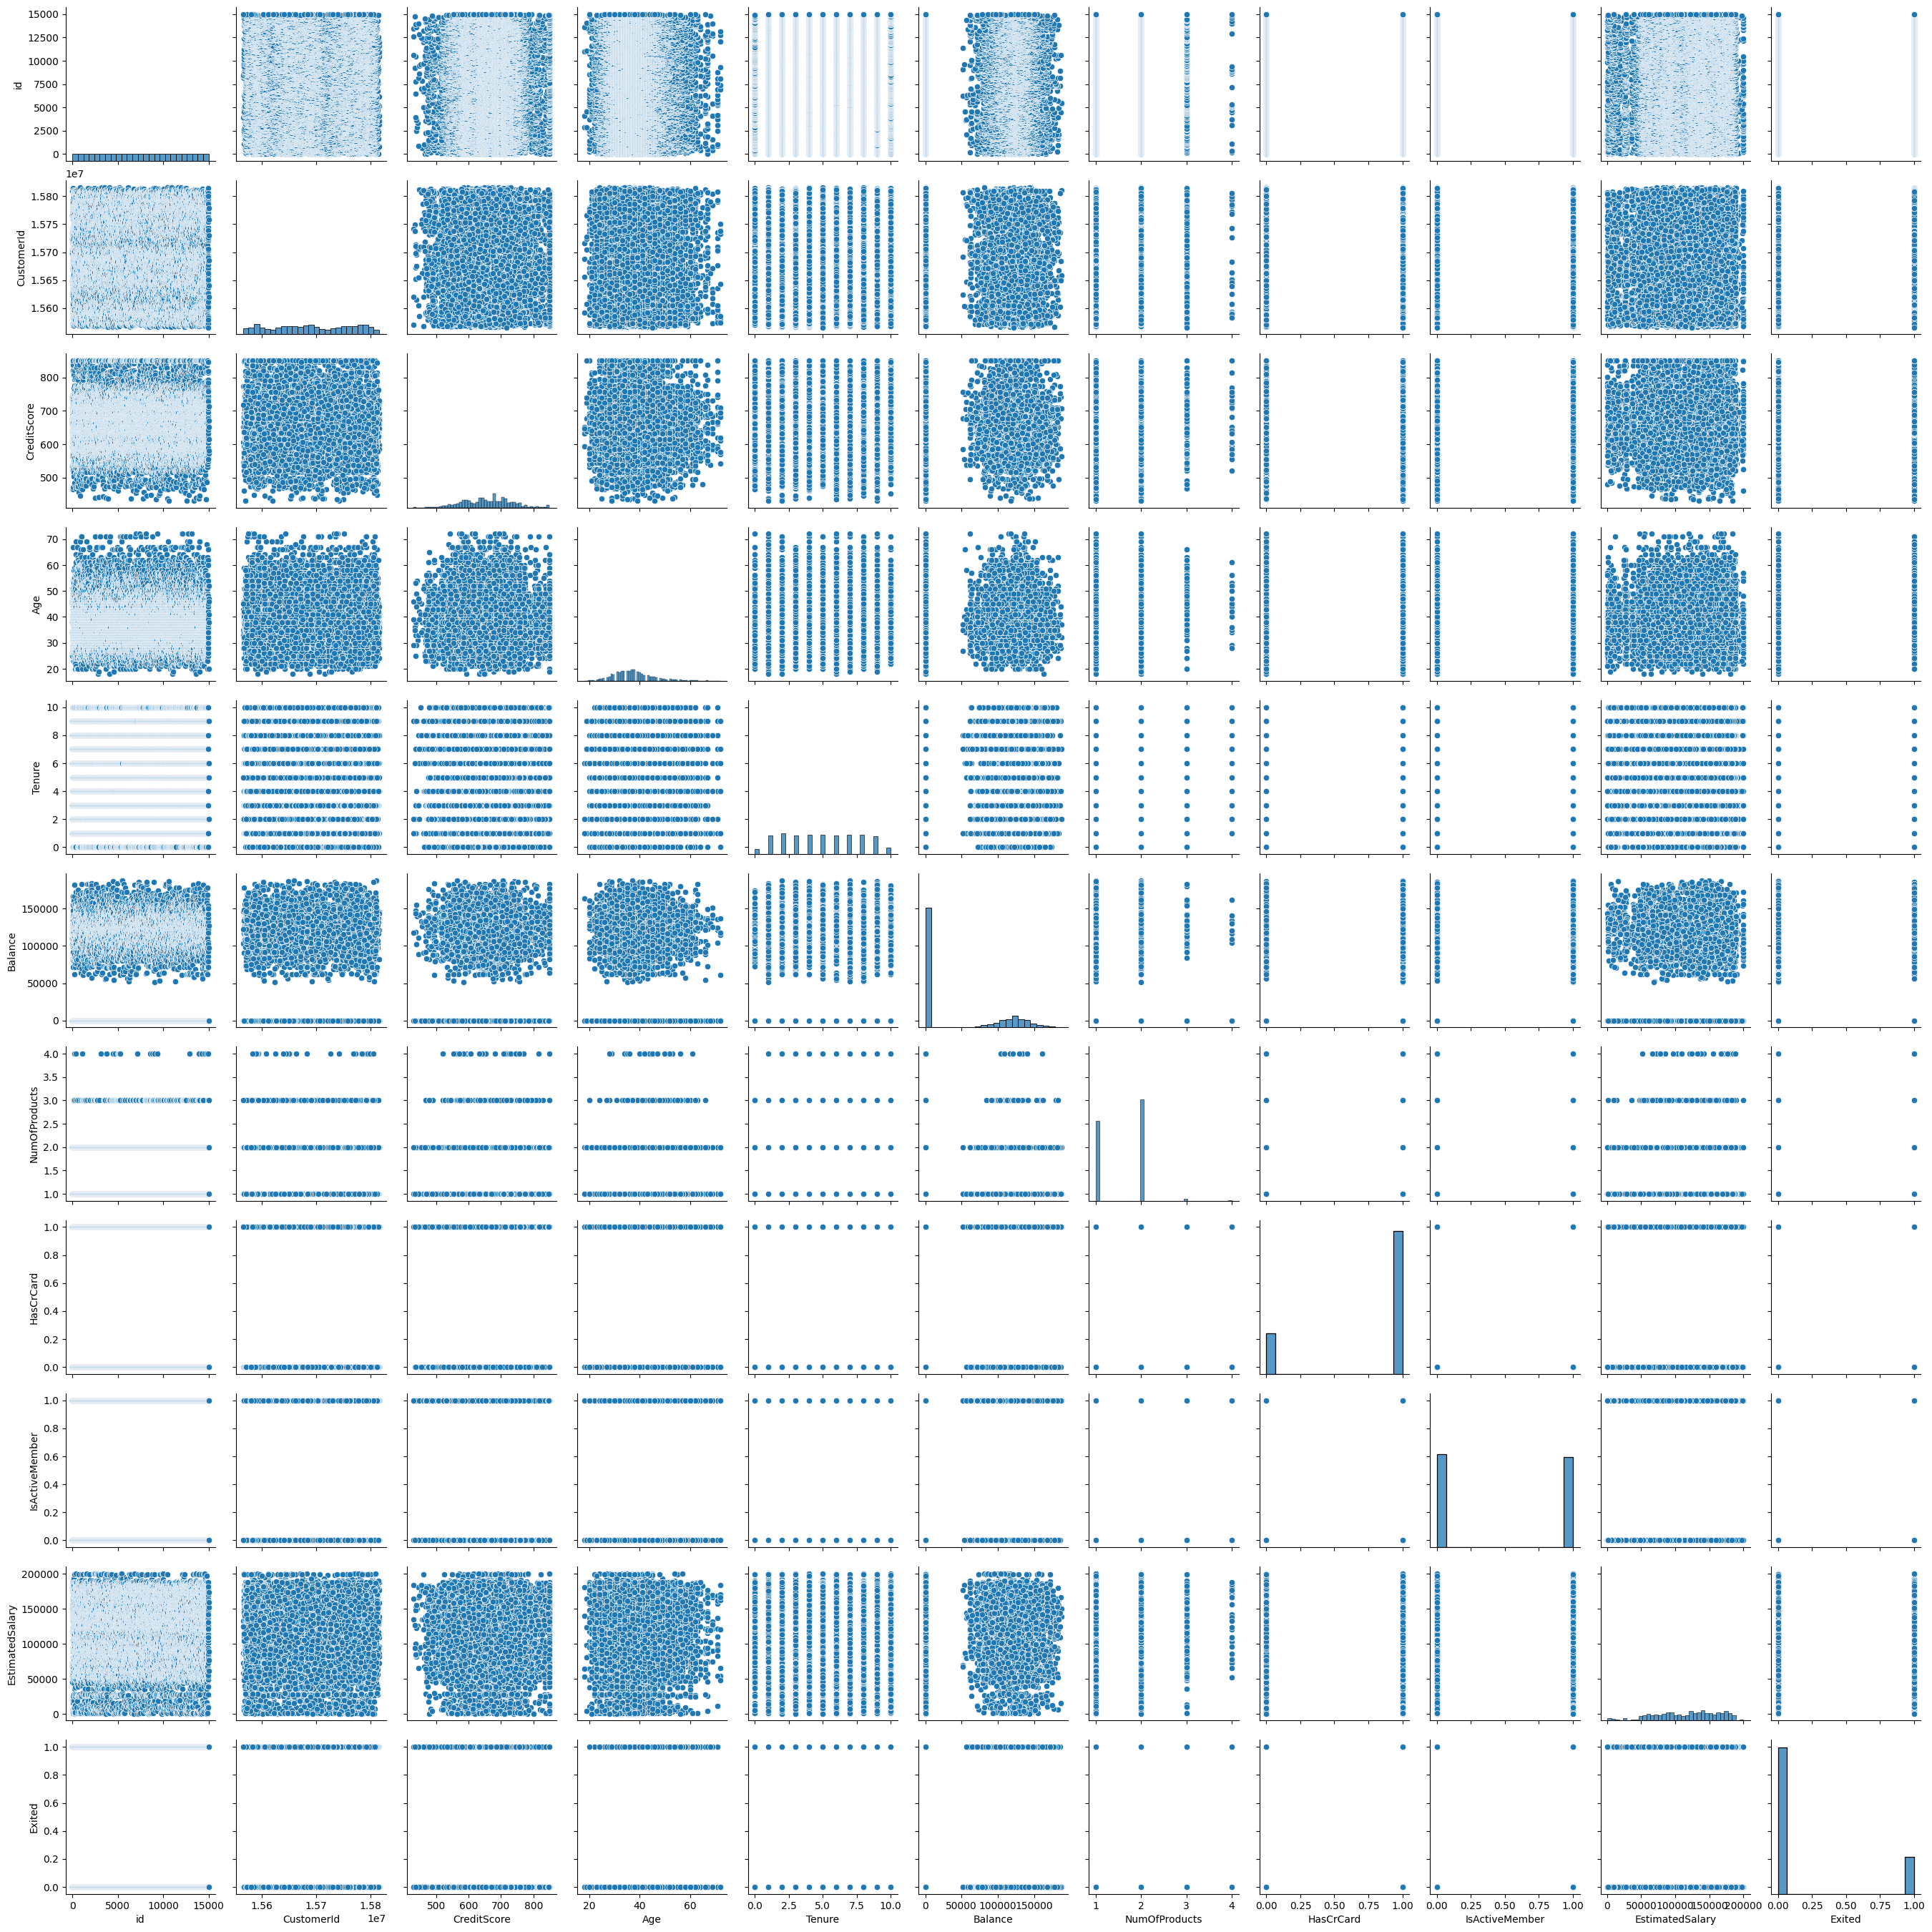

In [18]:
sns.pairplot(df)

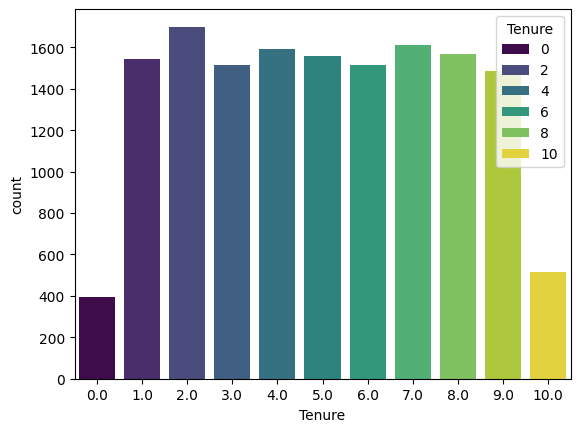

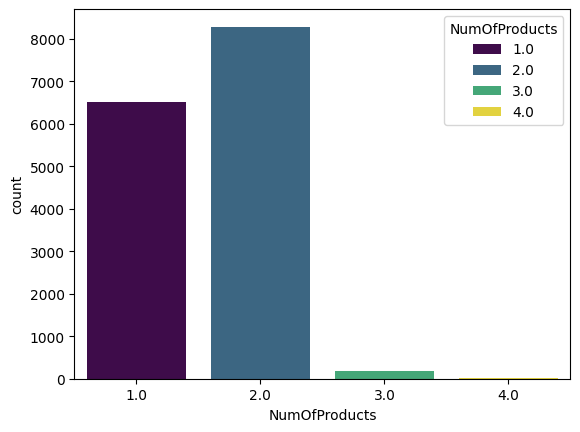

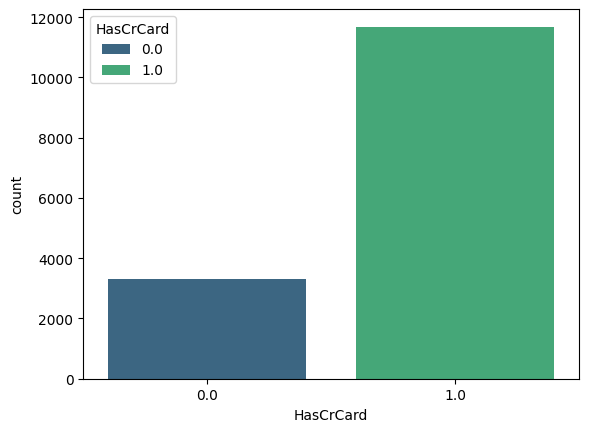

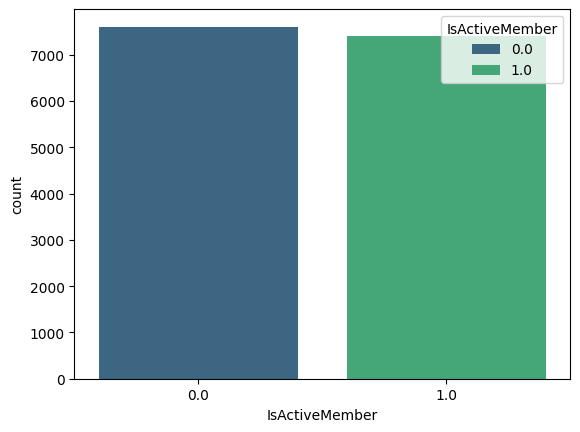

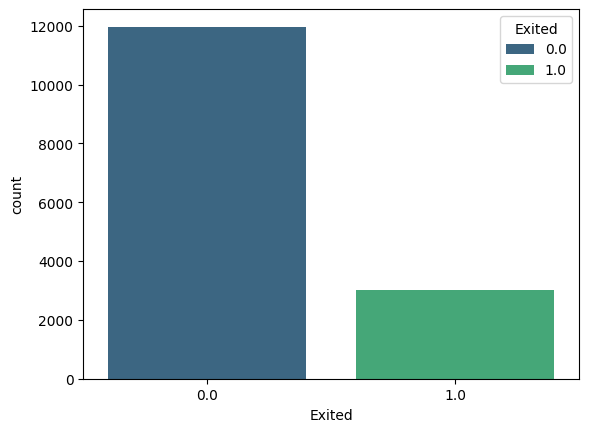

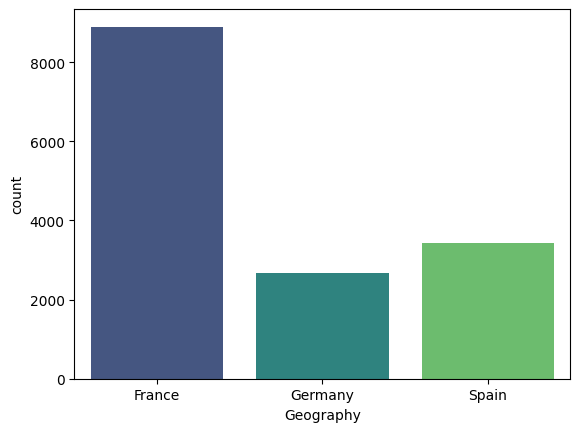

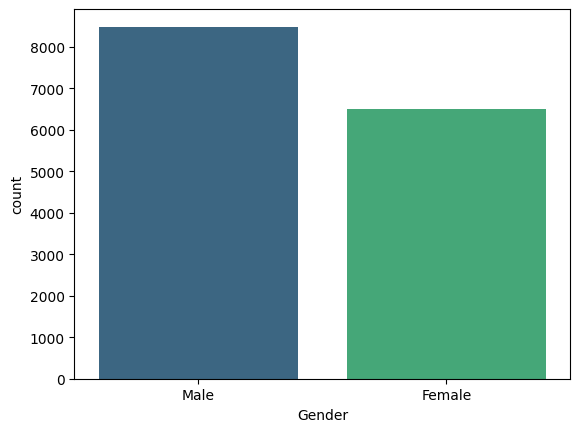

In [19]:
# plot count plot for each cat_col with different colors    
for cat_col in cat_cols:
    sns.countplot(data=df, x=cat_col, hue=cat_col, palette='viridis')
    plt.show()


In [20]:
X = df.drop(['Exited', 'Surname', 'CustomerId', 'id'], axis = 1)
y = df['Exited']

In [21]:
# encoding all the catergorical columns with object and category datatypes
encoder = LabelEncoder()
encoders = {}

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        X[col] = encoder.fit_transform(X[col])
        encoders[col] = encoder

In [22]:
encoders

{'Geography': LabelEncoder(), 'Gender': LabelEncoder()}

In [23]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,663.0,0,1,38.0,6.0,0.00,2.0,0.0,1.0,180591.32
1,678.0,0,0,26.0,2.0,0.00,1.0,1.0,1.0,44506.09
2,741.0,0,0,38.0,9.0,0.00,2.0,1.0,1.0,72969.90
3,535.0,1,0,46.0,8.0,117715.84,1.0,1.0,0.0,70778.62
4,671.0,1,0,51.0,6.0,101827.07,1.0,0.0,0.0,54439.73


In [24]:
# train test split into X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(12000, 10)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7752 - loss: 29.2989 - val_accuracy: 0.7477 - val_loss: 8.0325
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.7891 - loss: 4.3636 - val_accuracy: 0.7803 - val_loss: 4.8125
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.7962 - loss: 1.6810 - val_accuracy: 0.7780 - val_loss: 0.8574
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.7956 - loss: 1.2228 - val_accuracy: 0.7803 - val_loss: 0.5496
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.8024 - loss: 0.5058 - val_accuracy: 0.7803 - val_loss: 0.5281
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.8017 - loss: 0.5017 - val_accuracy: 0.7803 - val_loss: 0.5264
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.8022 - loss: 0.4987 - val_accuracy: 0.7803 - val_loss: 0.5264
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.8011 - loss: 0.

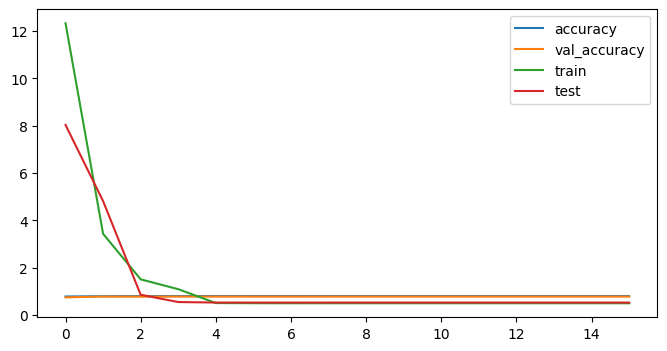

Accuracy: 78.03%
Loss: 0.53


In [58]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose = 1, validation_data=(X_test, y_test), callbacks=[early_stopping])

# plotting the loss and accuracy in a single plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# print loss and accurcay
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {round(accuracy*100, 2)}%')
print(f'Loss: {round(loss, 2)}')



In [27]:
# XGB classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# print the metrics
print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}%')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')


Accuracy: 88.97%
Confusion Matrix: 
[[2221  120]
 [ 211  448]]


In [28]:
# using random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# print the metrics

print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}%')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

Accuracy: 88.63%
Confusion Matrix: 
[[2235  106]
 [ 235  424]]


In [32]:
encoders

{'Geography': LabelEncoder(), 'Gender': LabelEncoder()}

In [50]:
# predict the test data with xgboost and create a submission file of probability of each class
df_X_test = df_test.drop(['Surname', 'CustomerId', 'id'], axis = 1)

for col in df_X_test.columns:
    if col in encoders:
        df_X_test[col] = encoders[col].fit_transform(df_X_test[col])

df_X_test.head()

y_pred = xgb.predict(df_X_test)

y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [51]:
# convert y_pred in Dataframe with column name of Exited
y_pred = pd.DataFrame(y_pred, columns=['Exited'])



In [52]:
y_pred

,Exited
0,0
1,0
2,0
3,1
4,1
...,...
9995,1
9996,1
9997,0
9998,0


In [53]:
submission = pd.concat([df_test['id'], y_pred], axis = 1)

In [54]:
submission

,id,Exited
0,15000,0
1,15001,0
2,15002,0
3,15003,1
4,15004,1
...,...,...
9995,24995,1
9996,24996,1
9997,24997,0
9998,24998,0


In [55]:
# export the file in csv format
submission.to_csv('Bank Churn 10k - submission final.csv', index = False)